In [1]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from lightgbm import LGBMClassifier
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
X,y = make_classification(n_samples=300,n_features=2,n_classes=4,n_redundant=0,n_clusters_per_class=1,n_informative=2)

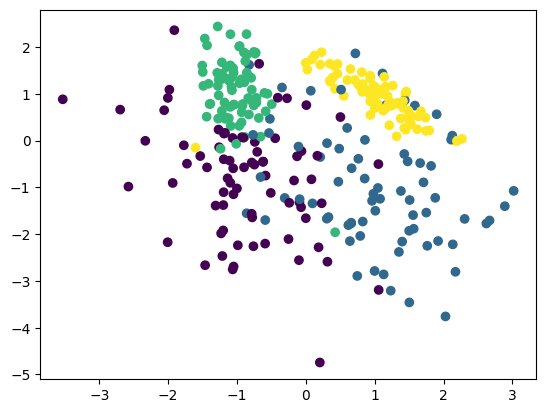

In [3]:
plt.scatter(X[:,0],X[:,1],c=y);

In [4]:
def plot_decision_boundary(data,labels,clf):
    plot_step = 0.02
    x_min, x_max = data[:,0].min() -1, data[:,0].max() + 1
    y_min,y_max = data[:,1].min() -1 , data[:,1].max() + 1

    xx,yy = np.meshgrid(np.arange(x_min,x_max,plot_step),
                   np.arange(y_min,y_max,plot_step))
    Z = np.array(clf.predict(np.c_[xx.ravel(),yy.ravel()]))
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx,yy,Z,cmap='cool')

    plt.xlabel('x')
    plt.ylabel('y')
    plt.title('Decision Boundary')

    plt.scatter(data[:,0],data[:,1],c=labels,cmap='hot',s=20)
    plt.show()

### Question a (3 points)

Make a train_test split with 20% test samples  (2 points)

In [5]:
print(len(X), len(y), 0.2*len(X))

300 300 60.0


In [6]:
train = X[:240]
test = X[240:]

In [7]:
y_train = y[:240]
y_test = y[240:]

### Question b (6 points)

 Train a DecisionTreeClassifier on the training set (choose your own hyper-parameters) . Predict labels on the test set. Compute accuracy_score and confusion_matrix and plot the decision boundary(6 points)

In [8]:
t_params = ((10,10,10), (20, 20, 20), (5, 5, 5))

In [9]:
for p1,p2,p3 in t_params:

    t_clf = DecisionTreeClassifier(max_depth=p1,min_samples_leaf=p2, random_state = p3)
    t_clf.fit(train, y_train)
    t_pred_test = t_clf.predict(test)
    print(accuracy_score(y_test, t_pred_test))
    print(confusion_matrix(t_pred_test,y_test))

0.7666666666666667
[[10  2  0  1]
 [ 0 12  0  2]
 [ 3  1 13  0]
 [ 0  5  0 11]]
0.7666666666666667
[[10  2  0  1]
 [ 0 12  0  2]
 [ 3  1 13  0]
 [ 0  5  0 11]]
0.8
[[12  2  0  1]
 [ 0 12  0  2]
 [ 1  1 13  0]
 [ 0  5  0 11]]


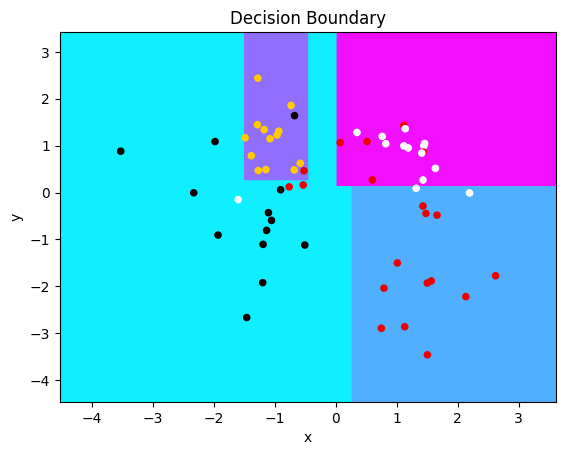

In [10]:
plot_decision_boundary(test, y_test, t_clf)

### Question c (6 points)

 Train a RandomForestClassifier on the training set (choose your own hyper-parameters) . Predict labels on the test set. Compute accuracy_score and confusion_matrix and plot the decision boundary(6 points)

In [11]:
rf_params = ((10,'sqrt',50,40), (20,'sqrt',30,40), (30,'sqrt',20,50))

In [12]:
for p1,p2,p3,p4 in rf_params:
    rf_clf = RandomForestClassifier(n_estimators=p1, max_features=p2, min_samples_leaf=p3, max_depth=p4)
    rf_clf.fit(train, y_train)
    rf_pred_test = rf_clf.predict(test)
    print(accuracy_score(y_test, rf_pred_test))
    print(confusion_matrix(rf_pred_test,y_test))

0.6
[[10  2  0  1]
 [ 0  0  0  0]
 [ 3  2 13  0]
 [ 0 16  0 13]]
0.7833333333333333
[[10  0  0  1]
 [ 0 12  0  1]
 [ 3  3 13  0]
 [ 0  5  0 12]]
0.7833333333333333
[[10  2  0  1]
 [ 0 12  0  1]
 [ 3  1 13  0]
 [ 0  5  0 12]]


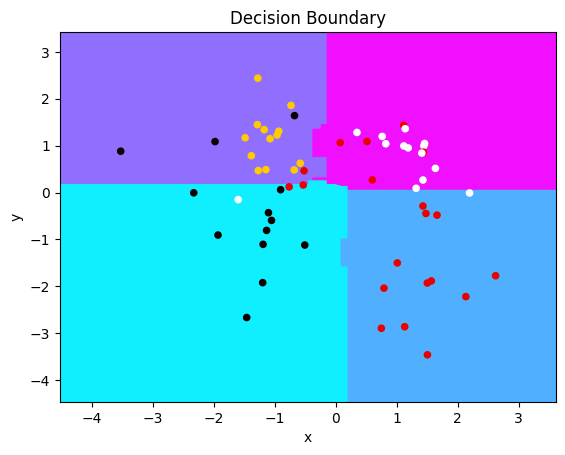

In [13]:
plot_decision_boundary(test, y_test, rf_clf)

### Question d (6 points)

 Train a AdaBoostClassifier on the training set (choose your own hyper-parameters) . Predict labels on the test set. Compute accuracy_score and confusion_matrix and plot the decision boundary(6 points)

In [14]:
ada_params = ((3,4,0.1), (6,10,0.3), (12,20,0.5))

In [15]:
for p1,p2,p3 in ada_params:

    ada_clf = AdaBoostClassifier(DecisionTreeClassifier(max_depth=p1),n_estimators=p2, learning_rate=p3)
    ada_clf.fit(train, y_train)
    ada_pred_test = ada_clf.predict(test)
    print(accuracy_score(y_test, ada_pred_test))
    print(confusion_matrix(ada_pred_test,y_test))


0.8
[[12  2  0  1]
 [ 0 12  0  2]
 [ 1  1 13  0]
 [ 0  5  0 11]]
0.7833333333333333
[[11  3  0  1]
 [ 2 11  0  1]
 [ 0  4 13  0]
 [ 0  2  0 12]]
0.7333333333333333
[[11  5  0  1]
 [ 2  8  0  1]
 [ 0  4 13  0]
 [ 0  3  0 12]]


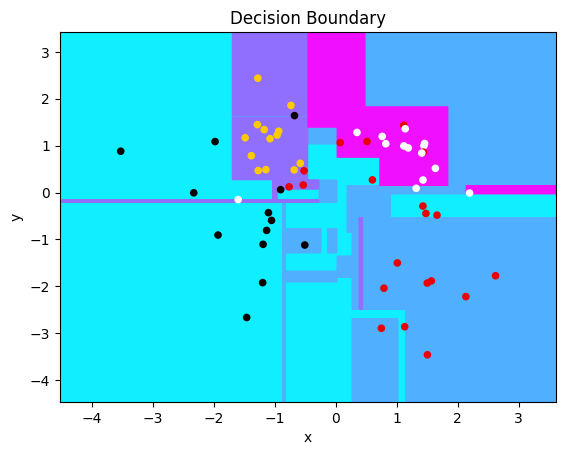

In [16]:
plot_decision_boundary(test, y_test, ada_clf)

### Question e (6 points)

 Train a GradientBoostingClassifier on the training set (choose your own hyper-parameters) . Predict labels on the test set. Compute accuracy_score and confusion_matrix and plot the decision boundary(6 points)

In [26]:
lgb_params = [
    (4, 3, 0.2, 25, 10),  # Lower min_data_in_leaf
    (8, 5, 0.05, 30, 15),  # Adjusted min_data_in_leaf
    (5, -1, 0.2, 20, 5)    # More aggressive decrease in min_data_in_leaf
]

In [27]:
for p1, p2, p3, p4, p5 in lgb_params:
    lgb_clf = LGBMClassifier(
        num_leaves=p1,
        max_depth=p2,
        learning_rate=p3,
        n_estimators=p4,
        min_data_in_leaf=p5
    )
    lgb_clf.fit(train, y_train)

    lgb_pred_test = lgb_clf.predict(test)

    print("Accuracy:", accuracy_score(y_test, lgb_pred_test))
    print("Confusion Matrix:\n", confusion_matrix(y_test, lgb_pred_test))

[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=10
[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=10
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000044 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 164
[LightGBM] [Info] Number of data points in the train set: 240, number of used features: 2
[LightGBM] [Info] Start training from score -1.369765
[LightGBM] [Info] Start training from score -1.510347
[LightGBM] [Info] Start training from score -1.321756
[LightGBM] [Info] Start training from score -1.353505
[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=10
Accuracy: 0.8333333333333334
Confusion Matrix:
 [[12  0  1  0]
 [ 2 12  1  5]
 [ 0  0 13  0]
 [ 1  0  0 13]]
[LightGBM] [Warning] min

[LightGBM] [Warning] min_data_in_leaf is set=5, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=5


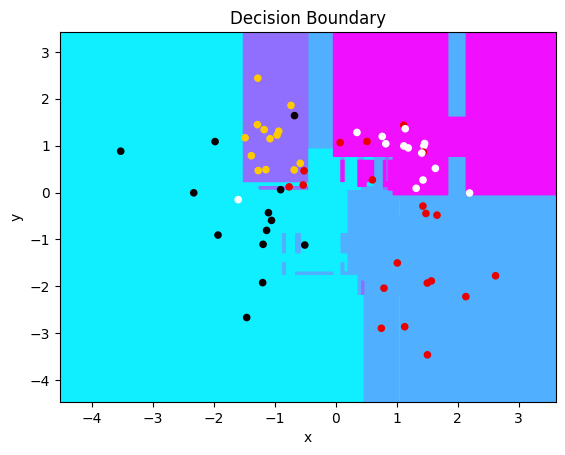

In [28]:
plot_decision_boundary(test, y_test, lgb_clf)